In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits


digits = load_digits()
data = digits.data
print(data.shape)
data = 255 - data
np.random.seed(1)

(1797, 64)


In [69]:
import os
from PIL import Image
import numpy as np

container_path = 'sandbox'
files = os.listdir(container_path)
data, targets = [], []
for file in files:
    file_name = file.split('.')[0]
    if len(file_name) == 1:
        targets.append(0)
    elif file_name[0] == '1' and len(file_name) == 2:
        targets.append(1)
    elif file_name[:2] == '11':
        targets.append(2)
    elif file_name[:2] == '21':
        targets.append(3)
    elif file_name[:2] == '31':
        targets.append(4)
    elif file_name[:2] == '41':
        targets.append(5)
    elif file_name[:2] == '51':
        targets.append(6)

    img = np.asarray(Image.open(f'{container_path}/{file}').convert('L'))
    data.append(img.flatten())
data = np.stack(data)
print(data.shape, len(targets))

(70, 262144) 70


In [71]:
n = 7 # 10
kmeans = KMeans(n_clusters=n, init='random', n_init='auto')
kmeans.fit(data)
Z = kmeans.predict(data)

Precision: 22.086 %
Recall: 17.143 %
F1 Score: 19.303 %
F1 Macro Score: 14.841 %
F1 Weighted Score: 14.841 %


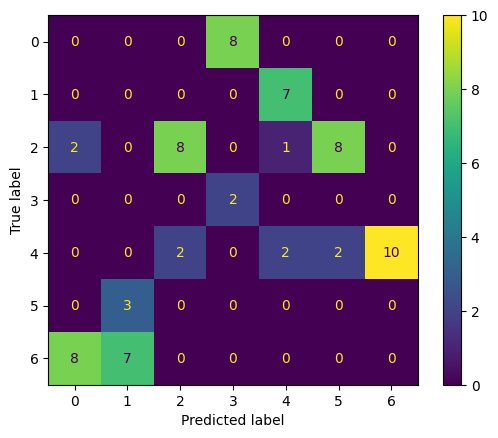

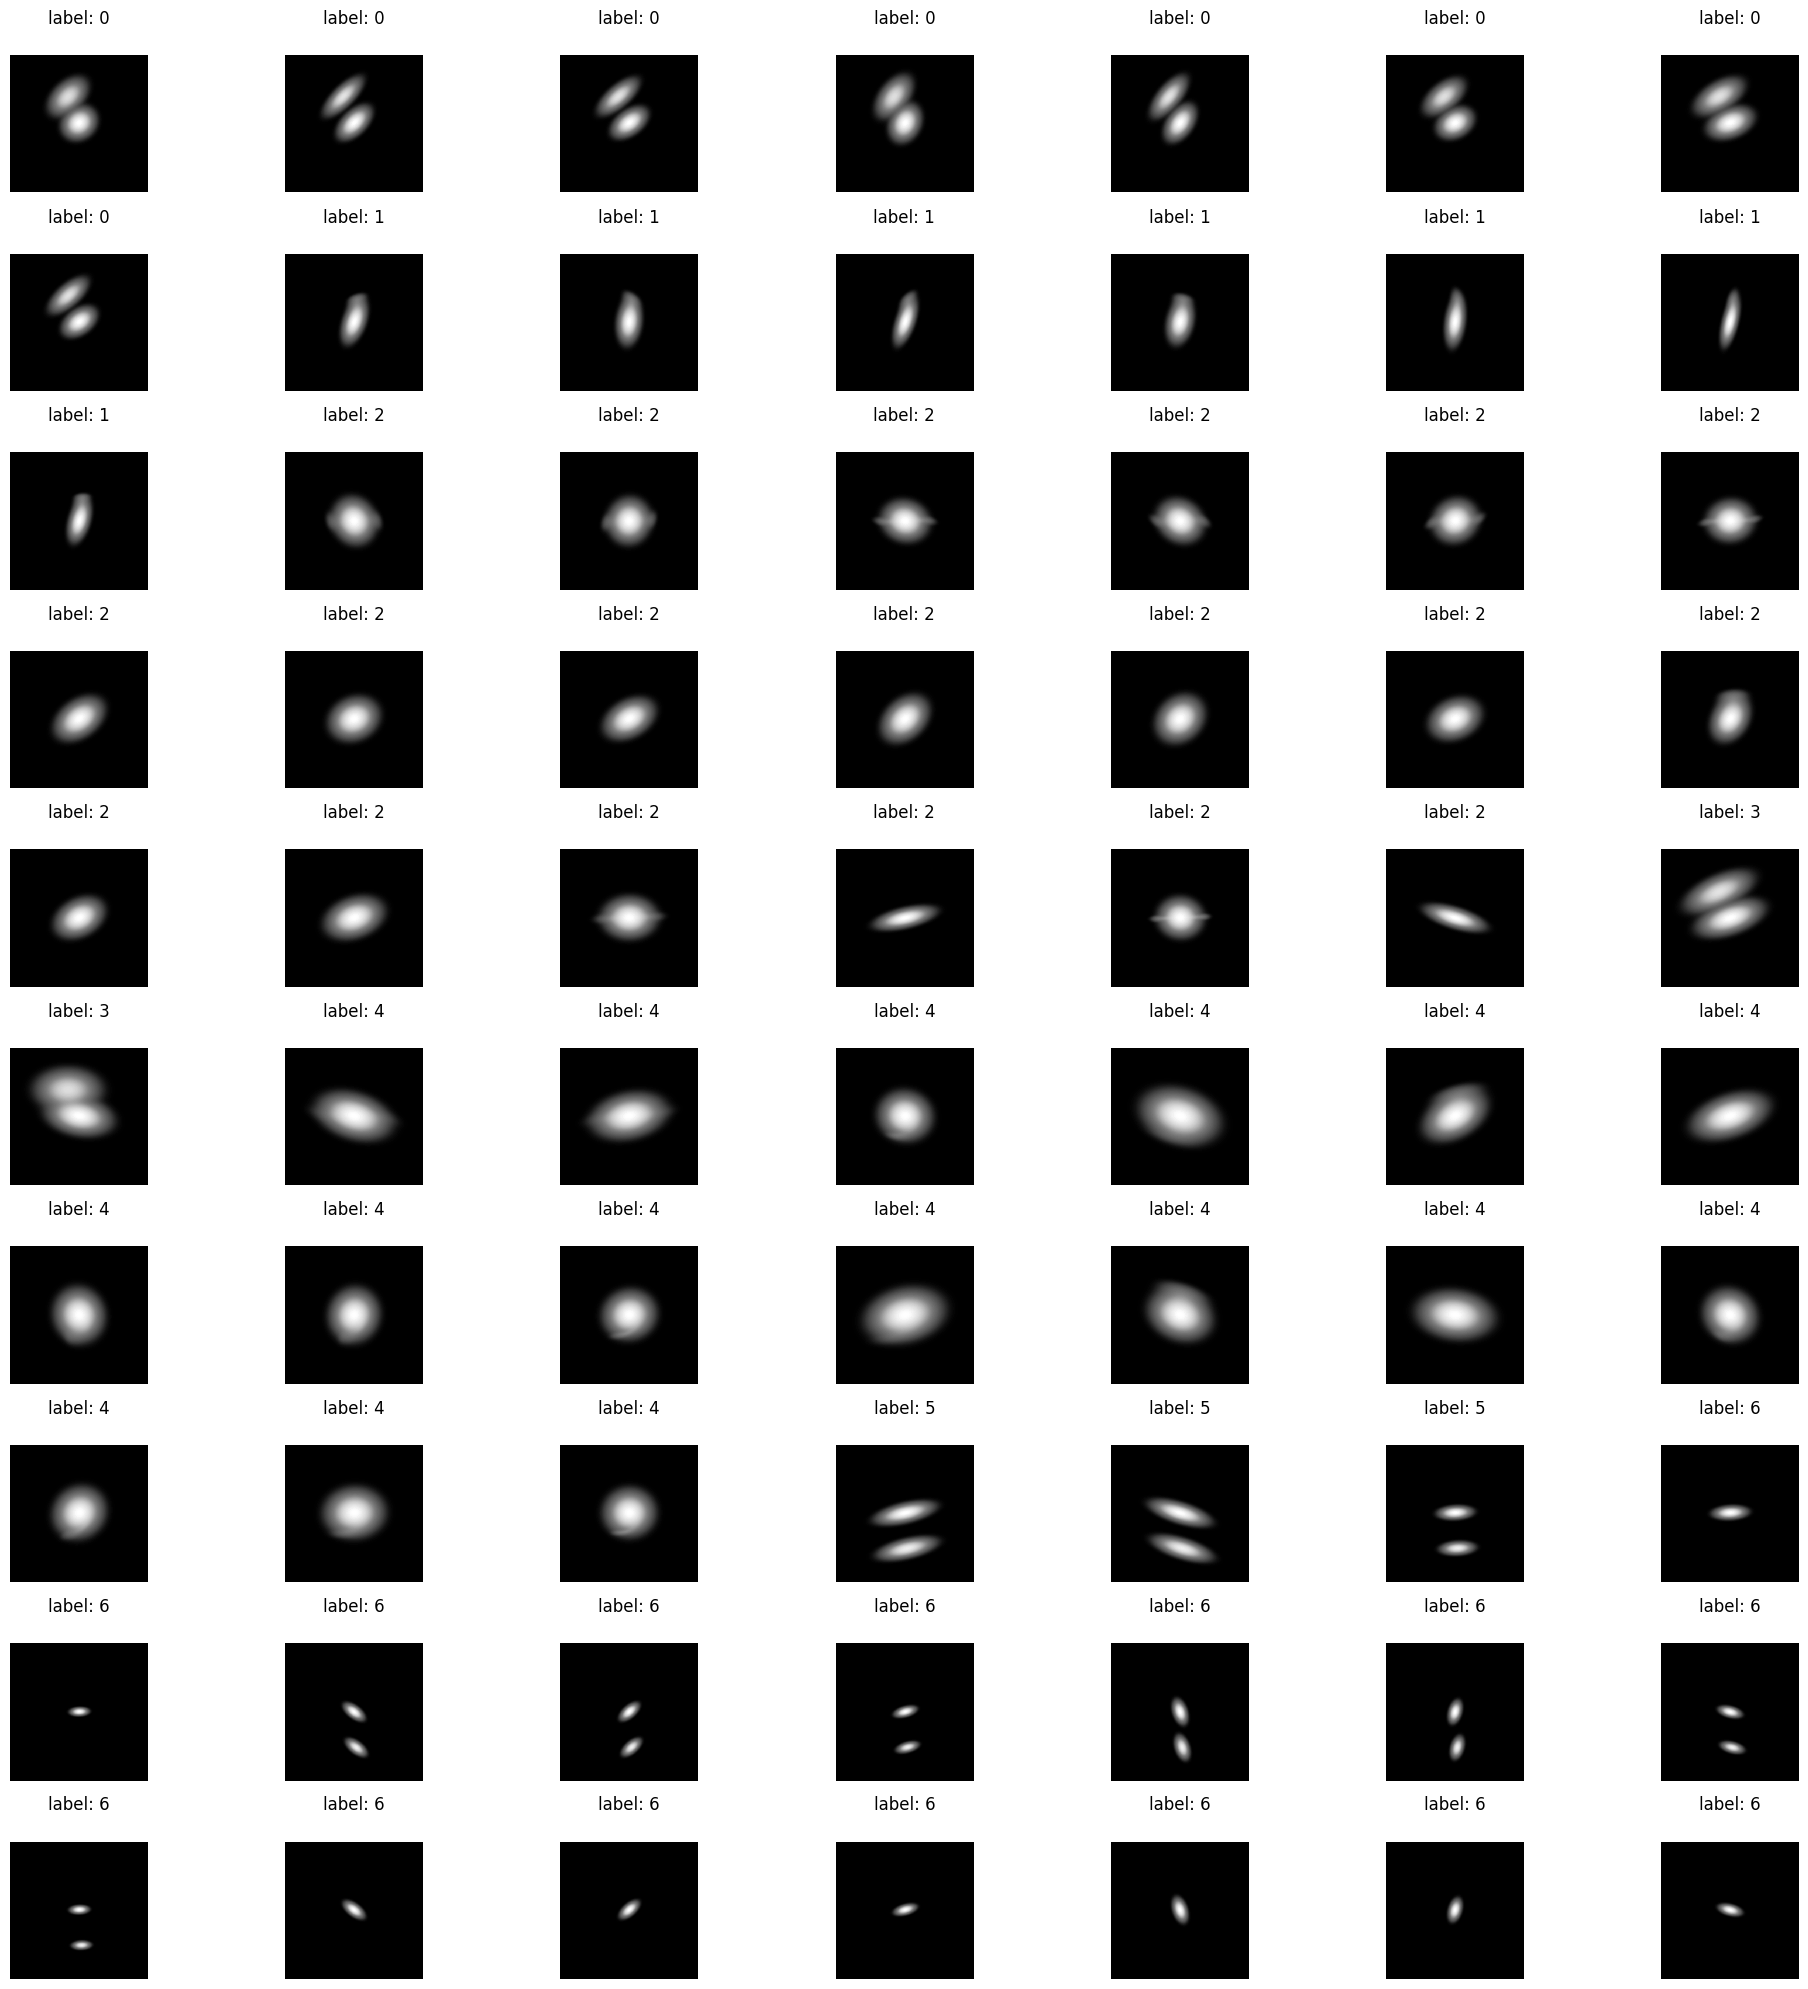

In [72]:
from sklearn.metrics import recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels = kmeans.labels_
results = list(zip(labels, data))

cm = confusion_matrix(labels, targets)
ConfusionMatrixDisplay(cm).plot()
plt.savefig(f'pictures/ConfMatrix_k_means.png', dpi=500)
precision = precision_score(targets, labels, average='macro')
recall = recall_score(targets, labels, average='macro')

f1 = 2 * precision * recall / (precision + recall)
f1_macro = f1_score(targets, labels, average='macro')
f1_weighted = f1_score(targets, labels, average='weighted')
print(f'Precision: {100 * precision:.3f} %')
print(f'Recall: {100 * recall:.3f} %')
print(f'F1 Score: {100 * f1:.3f} %')
print(f'F1 Macro Score: {100 * f1_macro:.3f} %')
print(f'F1 Weighted Score: {100 * f1_weighted:.3f} %')

results.sort(key=lambda x : x[0])
fig, axs = plt.subplots(10, 7, figsize=(20, 20))
plt.gray()
for i, ax in enumerate(axs.flat):
    image = np.reshape(results[i][1], (512, 512))
    ax.matshow(image)
    ax.set_title(f'label: {results[i][0]}')
    ax.axis('off')
fig.tight_layout()
plt.show()